## Introduction:

This Python code is designed to perform clustering analysis on housing market data using the K-means clustering algorithm. Clustering is a powerful unsupervised machine learning technique used to group similar data points together, making it useful for segmenting datasets into meaningful clusters or categories. In this notebook, I provide an overview of the code`s functionality, step-by-step explanations of the code snippets, and insights into the results obtained from clustering analysis.

### Machine Learning: K-means Clustering

 K-means is a popular unsupervised learning algorithm for grouping similar data points. K-means clustering is used to segment the data into distinct clusters based on specific features. This technique can uncover hidden patterns within the data, aiding in market segmentation and house profiling.

## Frameworks & Libraries used

- `numpy` (as `np`): A fundamental library for numerical operations, crucial for data transformations and algorithm implementations.

- `pandas` (as `pd`): A powerful library for data manipulation, which plays a vital role in data cleaning, categorization, and data representation.

- `matplotlib.pyplot` (as `plt`): A widely-used library for creating static, interactive, and animated visualizations, essential for data visualization.

- `%matplotlib inline`: A Jupyter Notebook magic command to display plots inline, making it easier to visualize data and statistics.

- `seaborn` (as `sns`): A library for enhancing the aesthetics and statistical information of matplotlib plots, useful for data visualization and pattern recognition.

I also import various modules from the scikit-learn library, which will be utilized later in the notebook:

- `KMeans`: A machine learning algorithm for clustering data, particularly useful in unsupervised learning tasks such as k-means clustering (The aim of this project).

- `PCA` (Principal Component Analysis): A dimensionality reduction technique often employed in data preprocessing.

- `StandardScaler`: A module for standardizing (scaling) features, a crucial step in data preprocessing for machine learning.

- `silhouette_score`: A metric for evaluating clustering performance, particularly relevant when using k-means clustering.

Finally, I suppress any warnings that might be displayed during the execution of my code using the `warnings.filterwarnings(`ignore`)` command, ensuring a smooth and clean execution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis: Data Inspection, Encoding and Preprocessing

- In this section of the notebook, I focus on the initial stages of data analysis. I begin by loading and inspecting the dataset, which is a fundamental step in any data science project. This includes checking for missing values and understanding the basic statistics of the data. Data cleanliness and completeness are crucial for reliable results. 

- Following the initial inspection, I perform data preprocessing tasks. This involves encoding categorical variables, making them suitable for machine learning algorithms. Binary and ordinal encoding techniques are applied to maintain the integrity of the data.

- This encoding process ensures that algorithms can effectively use these features for predictive tasks. I use binary encoding for binary variables and ordinal encoding for multi-level categorical variables, preserving the inherent information while making them suitable for algorithms.

### Loading Housing Market Data

- In this section, I start by loading the dataset from a CSV file named `HousingMarketData.csv` into a Pandas DataFrame. This step is fundamental in any data science or machine learning project, as it is where we acquire the data for analysis and modeling.
- I read in a dataset from a CSV (Comma-Separated Values) file named `HousingMarketData.csv` and stored it in a DataFrame called `df`. 
- The data was downloaded from Kaggle.com.

In [2]:
df = pd.read_csv(r'HousingMarketData.csv')

### Handling Missing Data

- In this section, I address missing data in the dataset. Handling missing data is a crucial step in data cleaning and preparation for machine learning algorithms.

- First, I calculate the number of missing values (null or NaN values) in each column of the DataFrame: I use the `.isnull()` method to identify missing values in each column of the DataFrame `df.` The `.sum()` function then tallies the count of missing values for each column.

- The output indicates that there are no missing values in any of the columns. This is an ideal scenario, as missing data can lead to issues in statistical analysis and machine learning algorithms. In cases where missing values are present, I would typically proceed with data imputation or decide whether to drop or retain those rows/columns, depending on the nature of the analysis and data privacy considerations.

- If I want, I can the remove rows with missing values with the second line which I have not executed as there are no null values in the dataset.

In [3]:
df.isnull().sum()

# df = df.dropna()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Inspection

#### Head

Then, I used the `.head()` method on the DataFrame `df` to display the first 5 rows of the dataset, providing a quick preview of what your data looks like. This is a common step in data analysis and machine learning projects to get a sense of the data`s structure, column names, and the values in the initial rows. It helps in understanding the dataset`s format and make initial observations about its content.

In [4]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

#### Data types

Then, I used the `.dtypes` attribute on the DataFrame `df` to display the data types of each column in the dataset. 

This is useful for understanding the data types of the features, as it helps ensure that data is appropriately represented and can inform subsequent data preprocessing steps, such as data type conversions if needed.

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Data Transformation: Encoding Categorical Variables

In this section, I perform data transformations to convert categorical variables into a numerical format, which is essential for many machine learning algorithms that require numeric input.

I use the `map()` function along with predefined dictionaries for encoding the categorical variables.

I use the following mappings for the transformation:

- `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, and `prefarea` columns are binary categorical variables, which are transformed using a binary encoding:
  - `yes` is replaced with 1.
  - `no` is replaced with 0.

- `furnishingstatus` is a categorical variable with multiple levels (`furnished`, `semi-furnished`, `unfurnished`). It is transformed into a numerical format using ordinal encoding:
  - `furnished` is replaced with 1.
  - `semi-furnished` is replaced with 0.5.
  - `unfurnished` is replaced with 0.

These transformations make the data suitable for machine learning algorithms, ensuring that the categorical variables are represented numerically. 

In [6]:
# Define mapping dictionaries for encoding
binary_encoding = {'yes': 1, 'no': 0}
furnishingstatus_encoding = {'furnished': 1,
                             'semi-furnished': 0.5, 'unfurnished': 0}

# Apply mapping to the respective columns
df['mainroad'] = df['mainroad'].map(binary_encoding)
df['guestroom'] = df['guestroom'].map(binary_encoding)
df['basement'] = df['basement'].map(binary_encoding)
df['hotwaterheating'] = df['hotwaterheating'].map(binary_encoding)
df['airconditioning'] = df['airconditioning'].map(binary_encoding)
df['prefarea'] = df['prefarea'].map(binary_encoding)
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_encoding)

#### Head

In [7]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0               1.0  
1               1.0  
2               0.5  
3               1.0  
4               1.0

### Getting the dimensions of the dataframe

In [8]:
df.shape

(545, 13)

#### Description of the dataframe

In [9]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          0.465138  
std      0.861586    0.424302          0.380686  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          0.500000  
75%      1.000000    0.000000          1.000000  
max      3.000000    1.000000          1.000000

#### Data types

This time all the columns have integer data type due to the encoding/transformation

In [10]:
df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

## Data Visualization & Exploring Data Distributions

- In this section, I explore the distribution of numerical variables in the dataset. Understanding how these variables are distributed is crucial for feature selection, model building, and identifying potential outliers.

- Visualizing data distributions is essential for uncovering insights. 

- The aim is to visualize the spread, central tendencies, and potential outliers within these variables. Understanding these distributions is crucial for feature selection and model development.

### Some basic Visualisation plots

#### Distribution of Bedrooms

- In this section, I visualize the distribution of the number of bedrooms in the dataset. This type of visualization is crucial in data science and machine learning for understanding the characteristics of a key feature, which, in this case, is the number of bedrooms in houses.

- The bar plot generated here provides an overview of how many houses have different numbers of bedrooms. Each bar on the plot corresponds to a specific number of bedrooms, and the height of each bar indicates the count of houses with that particular number of bedrooms. 

- We can see that 3 bedrooms is the most common 6and 1 being the least common in the dataset.

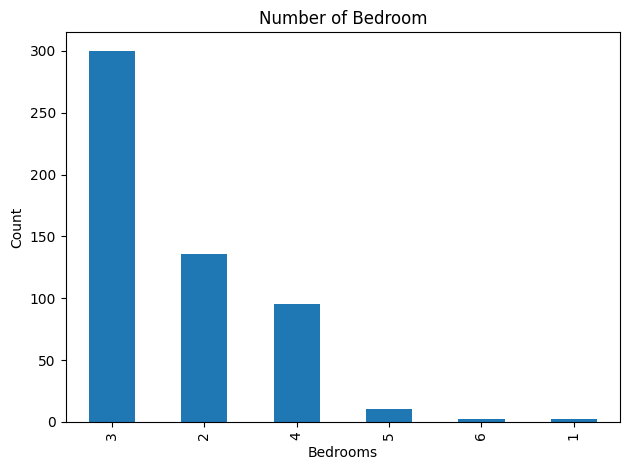

In [11]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

plt.tight_layout()

#### Price vs. Area Scatter Plot

- A scatter plot is created to visualize the relationship between two important features: **Price** and **Area**. This plot can reveal any patterns or correlations between house prices and their respective areas.

- We can see that as the area increases, the price increases as well.

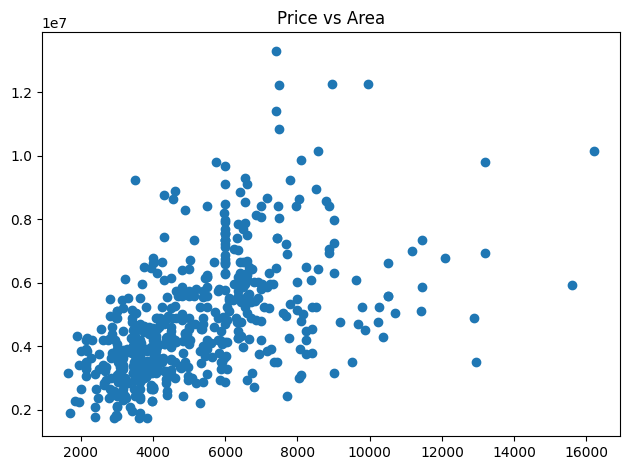

In [12]:
plt.scatter(df.area, df.price)
plt.title("Price vs Area")

plt.tight_layout()

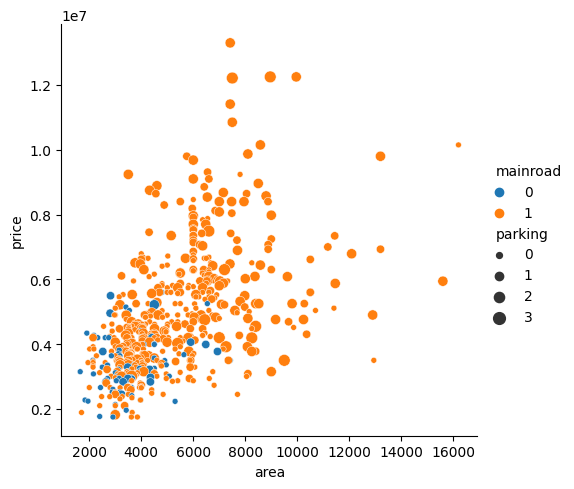

In [13]:
sns.relplot(x='area', y='price', hue='mainroad', size='parking', data=df)

### 13 Distibution Subplots

- Then, I analysed the data by creating a set of subplots to visualize the distribution of numerical variables from the dataset using distplots.

- The result is a set of 13 subplots, each showing the distribution of one of the specified numerical variables from the dataset. 

- As it is a massive plot and is displayed inline, viewing it and all other plots on a large screen is essential.

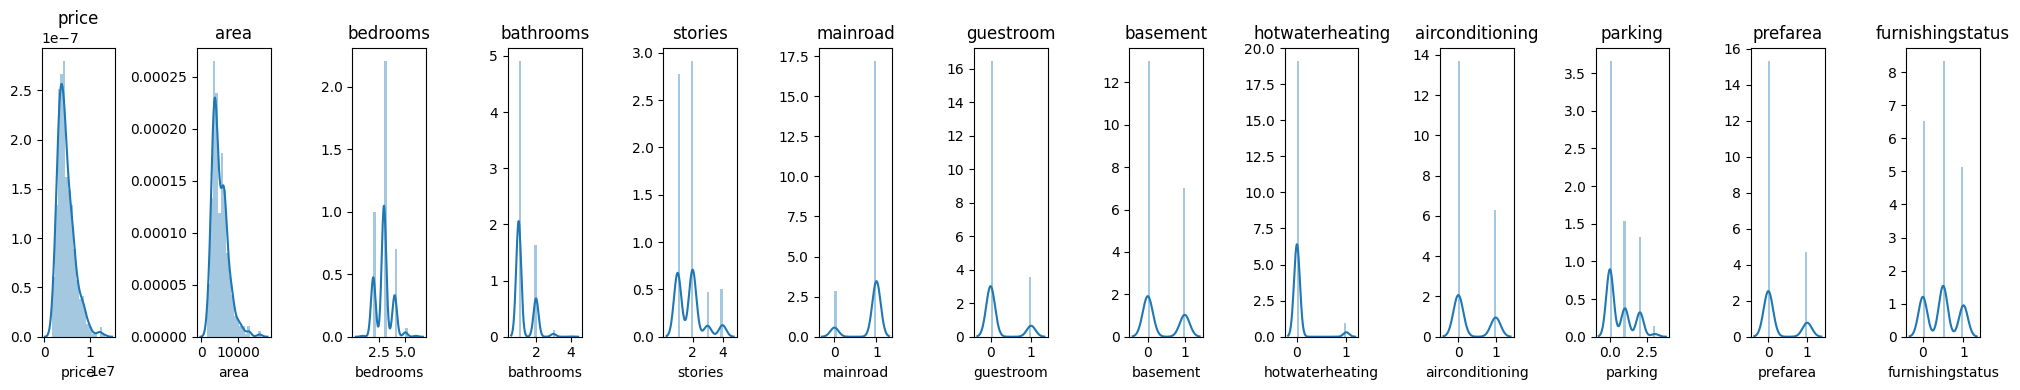

In [14]:
plt.figure(1, figsize=(20, 4))

n = 0

for x in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
    n += 1
    plt.subplot(1, 13, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('{}'.format(x))
    plt.ylabel('')

plt.tight_layout()

### Multivariate Analysis of Numerical Features with regression lines

- Then, I created a grid of scatter plots to visualize the relationships between pairs of numerical and categorical variables from the dataset. 

- In this section of the notebook, I conduct a comprehensive analysis of the relationships between pairs of numerical variables in the dataset. This is done using scatter plots with **regression lines**. Each subplot in the resulting grid represents the relationship between two specific variables, making it easier to identify potential correlations or patterns. 

- This analysis helps in understanding how different variables interact with each other and whether there are any  relationships between them. Insights gained from these visualizations can be valuable for feature selection and modeling in data science and machine learning projects. The resulting grid of scatter plots provides a holistic view of the relationships between various numerical features in the dataset.

- The result is a grid of 13x13 scatter plots, with each subplot showing the relationship between a pair of variables. This type of visualization helps in exploring potential correlations and associations between different features in the dataset.

- As it is a massive plot and is displayed inline, viewing it and all other plots on a large screen is essential.

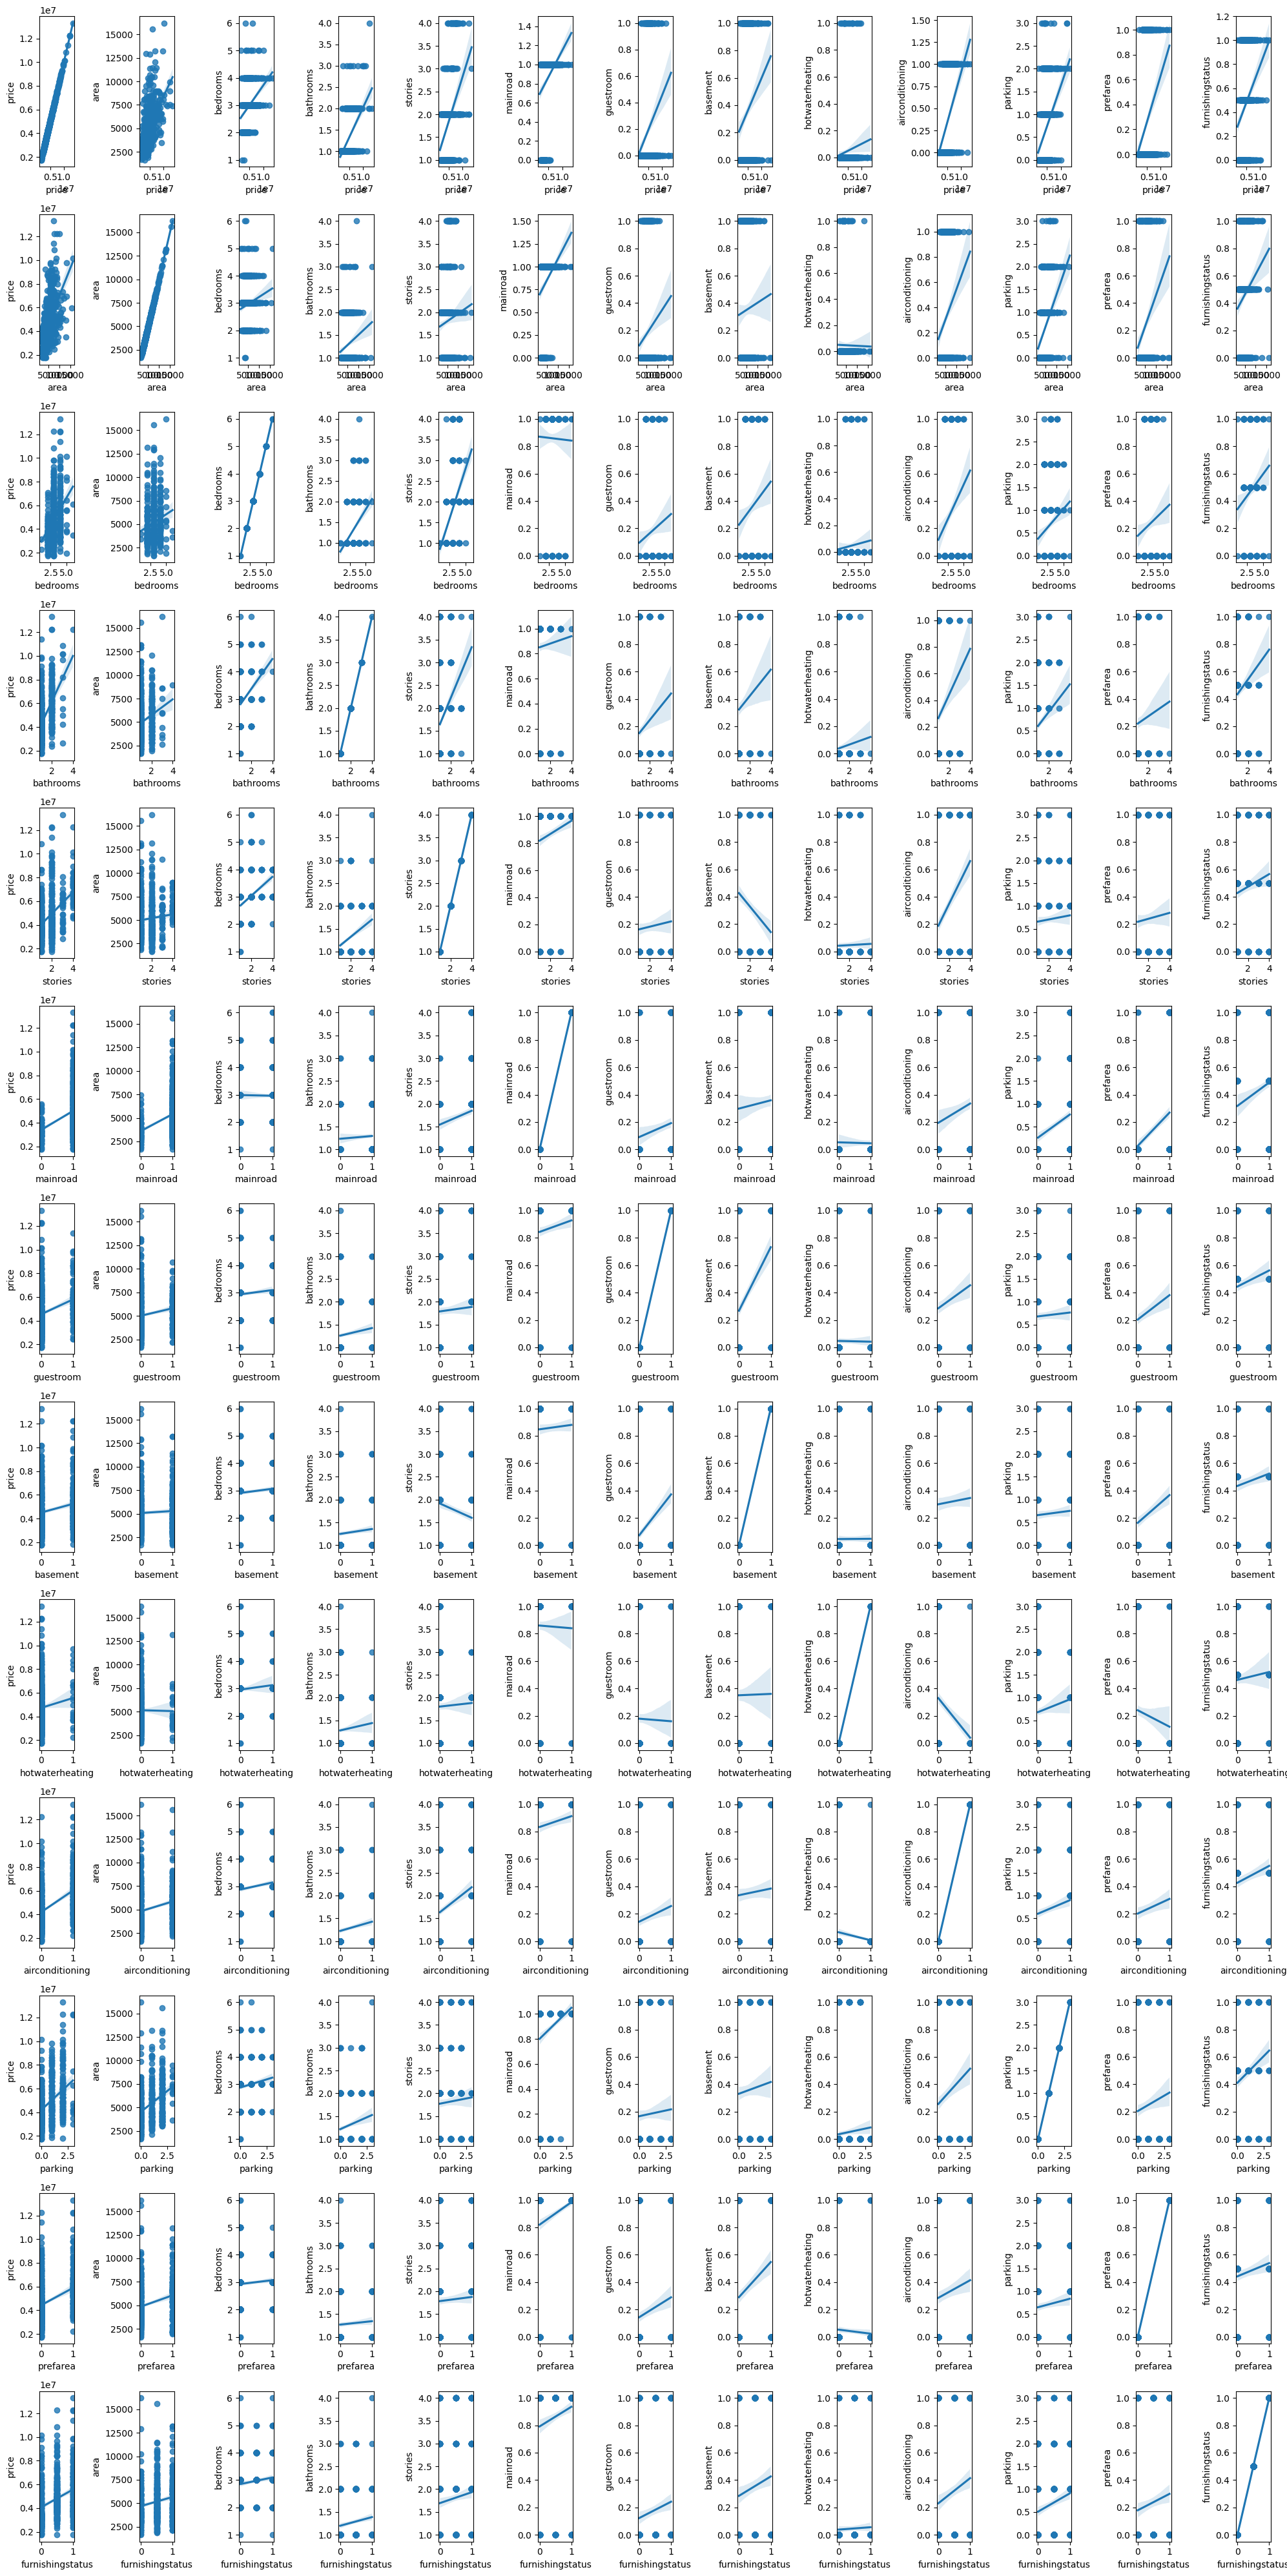

In [15]:
plt.figure(figsize=(20, 40))

n = 0

for x in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
    for y in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
        n += 1
        plt.subplot(13, 13, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
        plt.xlabel(x)

plt.tight_layout()

### Visualizing Pairwise Relationships

- In this section, I create a pairplot to visualize the pairwise relationships between selected attributes in the dataset. A pairplot is a grid of scatterplots, allowing us to explore how variables relate to each other.

- The data points are color-coded based on their `price` values. This coloring helps us differentiate data points belonging to different price ranges.

- To enhance visualization, I set a white grid background using `sns.set_style("whitegrid").`

- The resulting pairplot offers a visual exploration of how selected attributes relate to each other and how they are distributed across different price ranges. This type of visualization is valuable for identifying patterns, trends, and potential insights within the data.

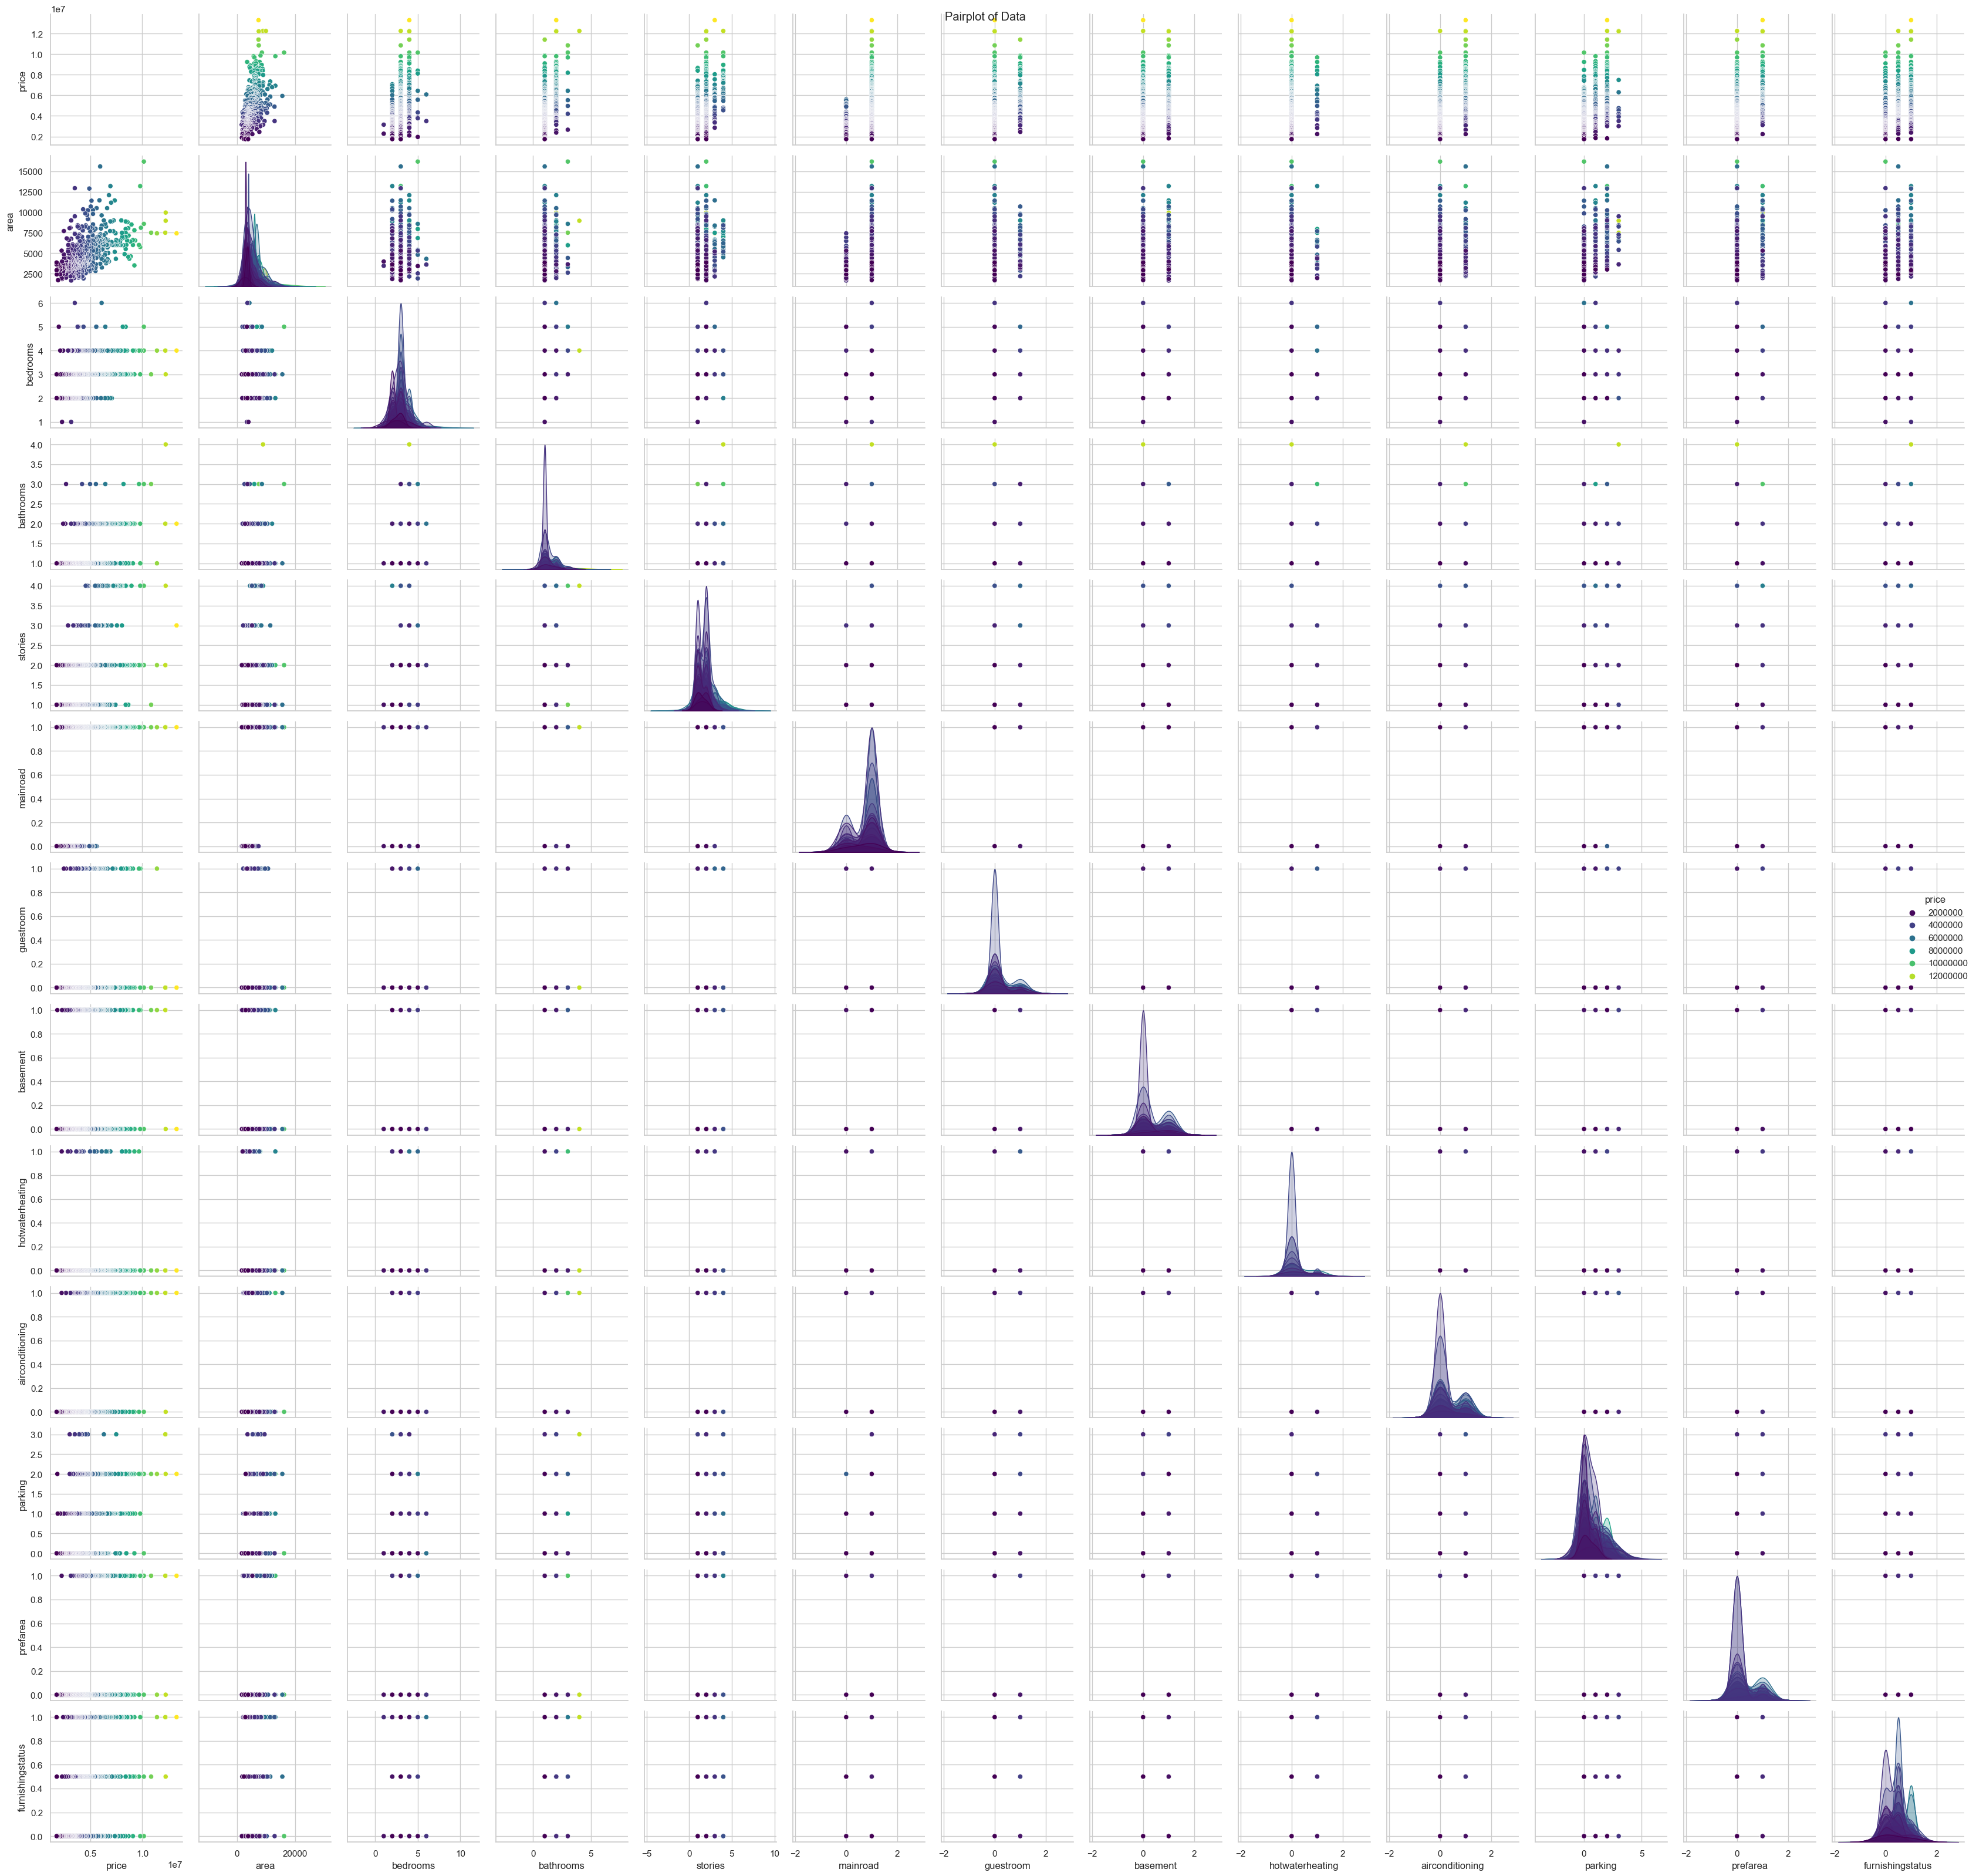

In [16]:
sns.set(style="ticks")

cluster_attributes = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                      'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

sns.set_style("whitegrid")  # Add a grid for better visualization

# Set hue to the categorical attribute you want to use for coloring
sns.pairplot(data=df, hue='price', vars=cluster_attributes, palette='viridis')

plt.suptitle('Pairplot of Data')

plt.tight_layout()

### Exploring Correlation Coefficients through Heatmap

- In this section, I conduct a comprehensive analysis of the correlation coefficients between variables in the dataset. The goal is to identify which variables exhibit high correlations with each other, which can be crucial in understanding relationships within the data.

- A heatmap is generated to visualize the correlation matrix of the dataset. The `YlGnBu` colormap is used to emphasize correlations, with colors ranging from yellow (low correlation) to dark blue (high correlation).

- The heatmap includes annotations, which display the actual correlation coefficients within each cell. These values provide quantitative insights into the strength and direction of correlations between variables.

- Correlation analysis is essential for feature selection, model building, and understanding the interplay between different attributes in the dataset. By identifying highly correlated variables, we can make informed decisions about potential multicollinearity and the relevance of specific features in our analysis.

- We can see the price is most affected by area, number of bathrooms and airconditioning.

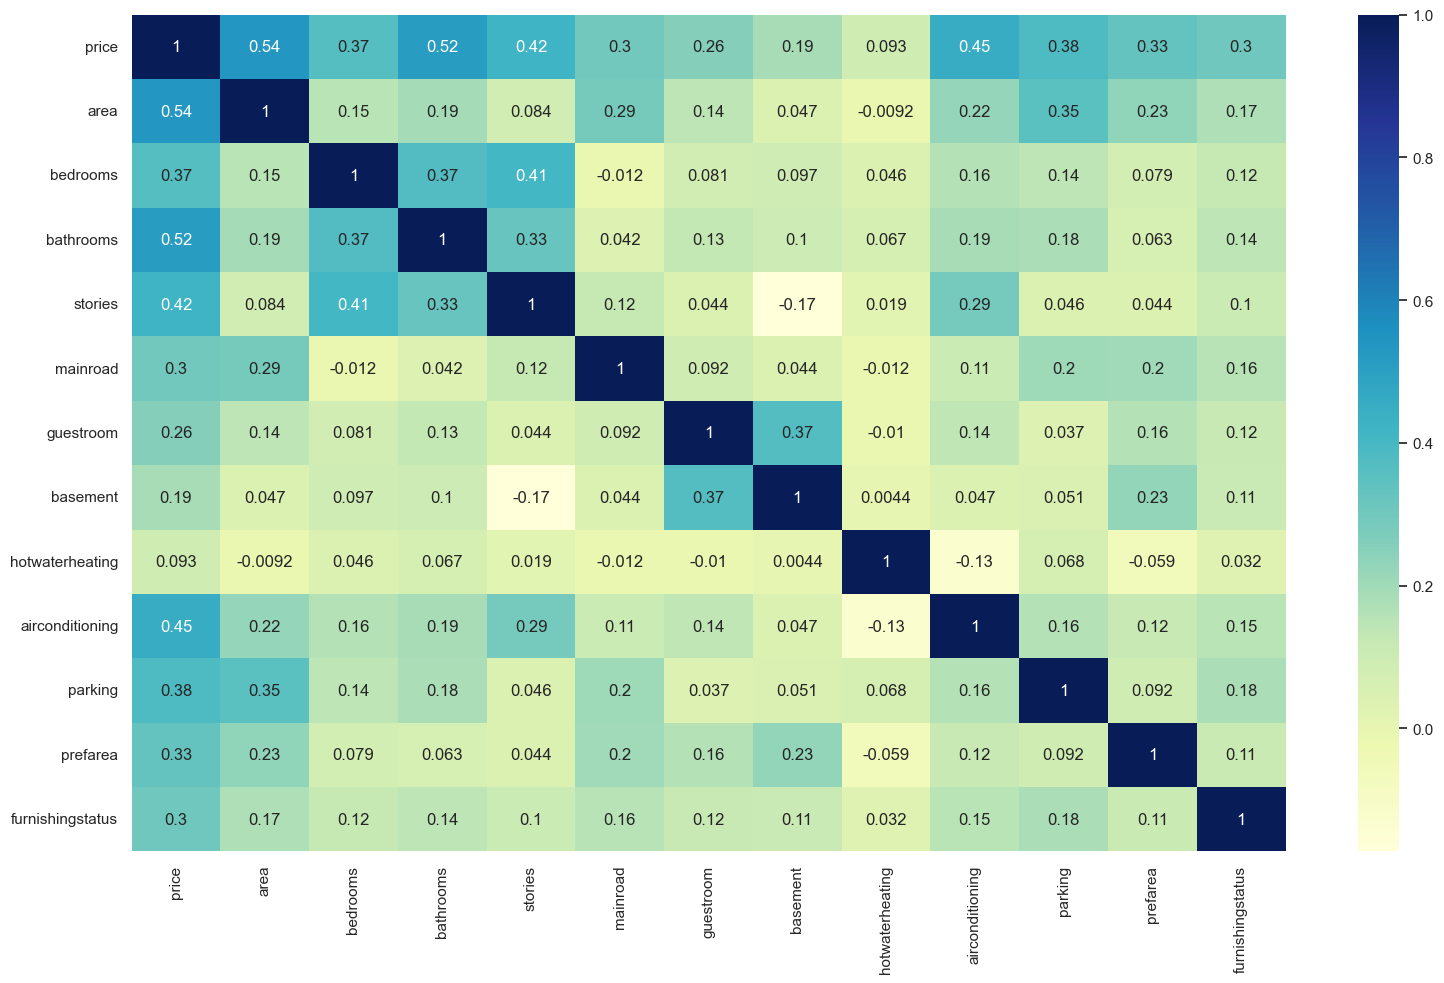

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16, 10))

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

plt.tight_layout()

### Outlier Analysis: Identifying and Visualizing Outliers

Outliers can significantly impact analysis and modeling. In this section, I perform outlier analysis, identifying and visualizing outliers within the dataset. Outliers are data points that deviate significantly from the typical pattern and can skew results. Understanding and addressing outliers are crucial for robust data analysis.

Throughout the notebook, I leverage data science and machine learning techniques to gain insights into the dataset, develop predictive models, and uncover valuable information for housing market analysis and decision-making.
Certainly, here are appropriate headings for each section in your kernel:

#### Boxplots for Categorical Attribute Analysis

- In this section, I employ boxplots to analyze how specific categorical attributes influence the 'price' of properties in the dataset. These boxplots provide valuable insights into how different categorical variables impact housing prices.

- These boxplots help us understand the influence of categorical attributes on housing prices. They reveal potential price variations among different categories, which is essential for feature selection and understanding market dynamics. This analysis contributes to the data science process by providing insights into how specific attributes relate to the target variable, 'price.'

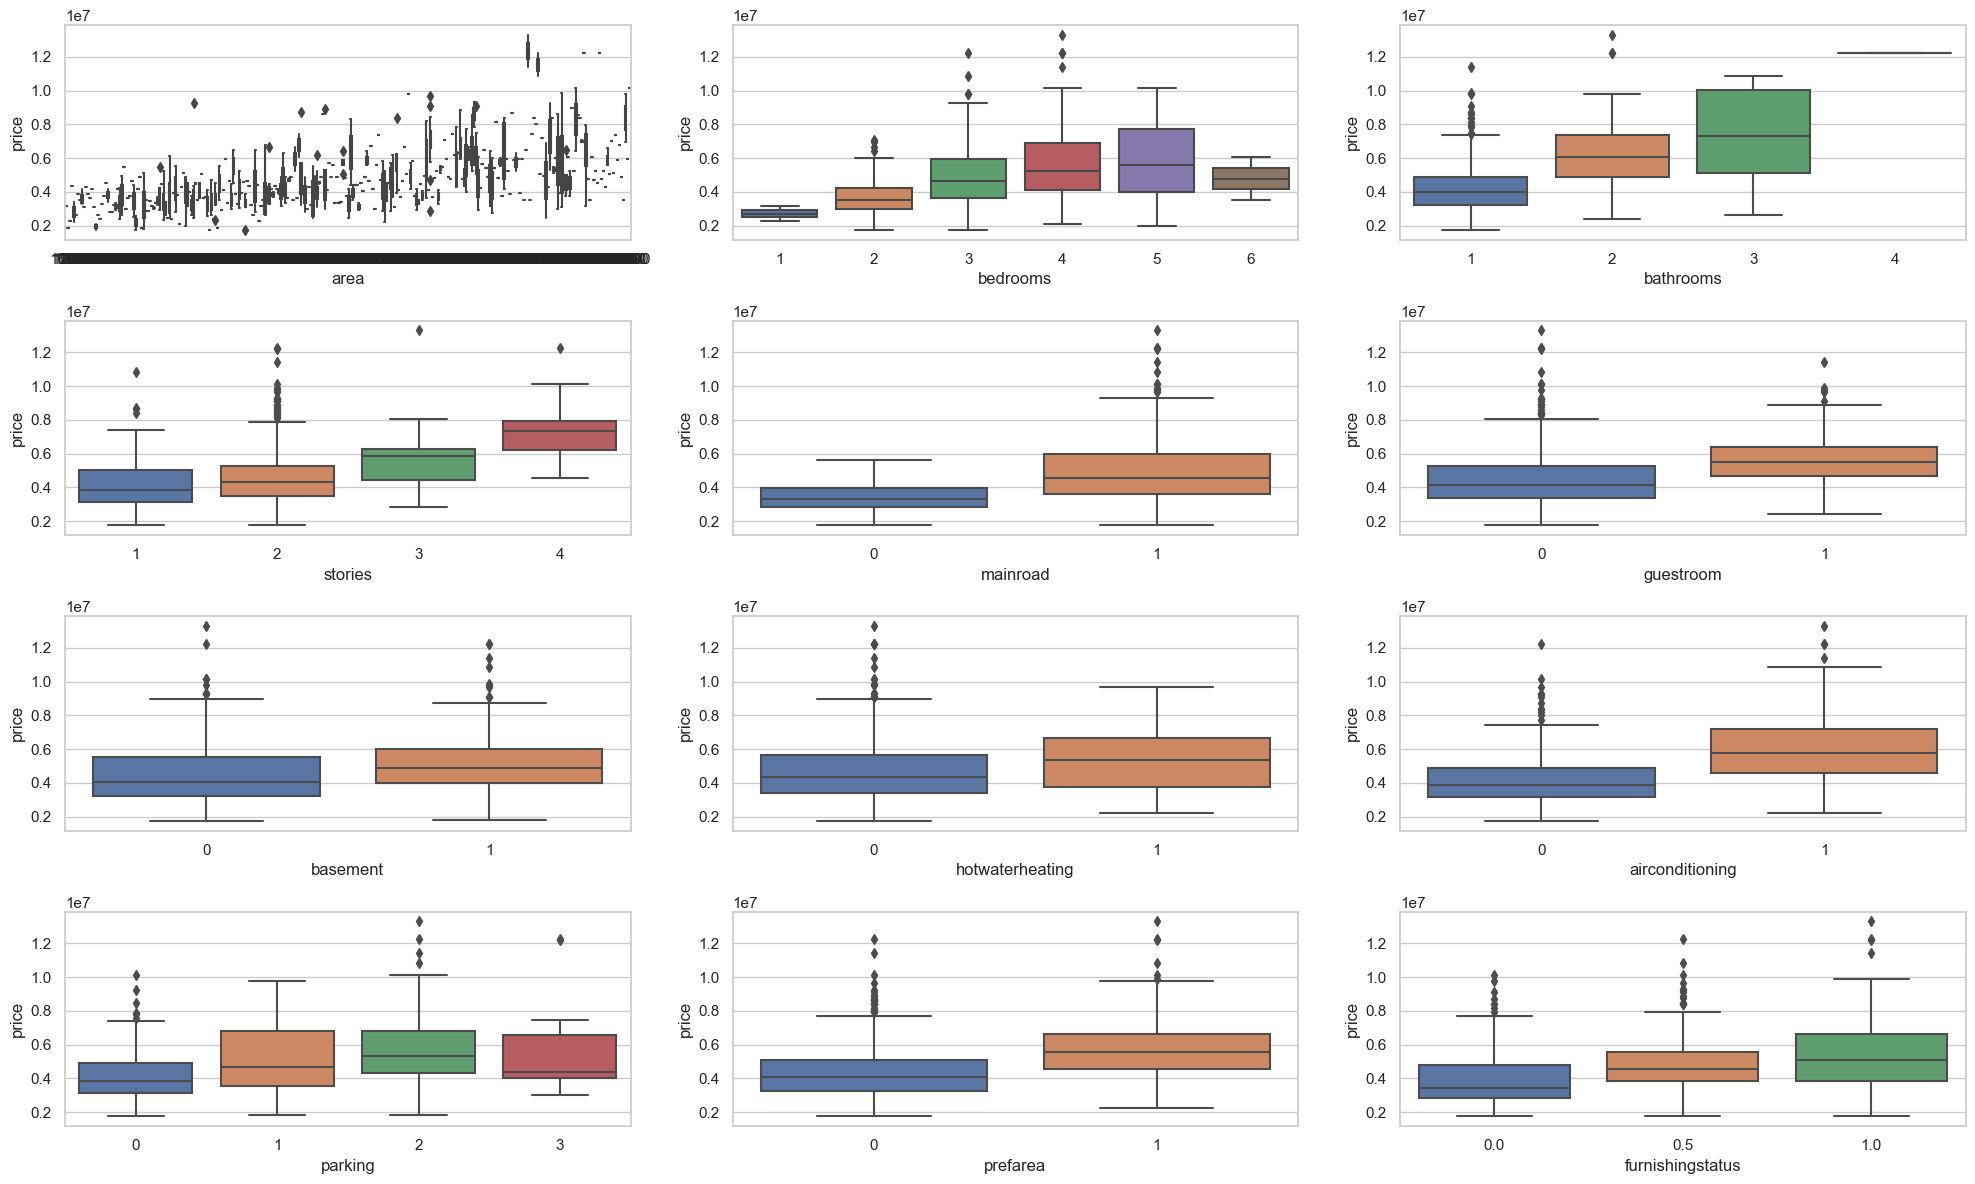

In [18]:
plt.figure(figsize=(20, 12))

j = 1

for i in ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
    plt.subplot(4, 3, j)
    sns.boxplot(x=i, y='price', data=df)
    j += 1

plt.tight_layout()

### Violin Plots for Attribute Analysis

- In this section, I employ violin plots to analyze the relationships between various attributes and the 'price' of properties in the dataset. Violin plots offer a comprehensive view of the attribute distributions and their impact on housing prices.

- These violin plots offer a comprehensive analysis of how various attributes influence housing prices. They provide insights into attribute distributions, spread, and their impact on property values. This analysis contributes to the process by informing feature selection and market analysis.

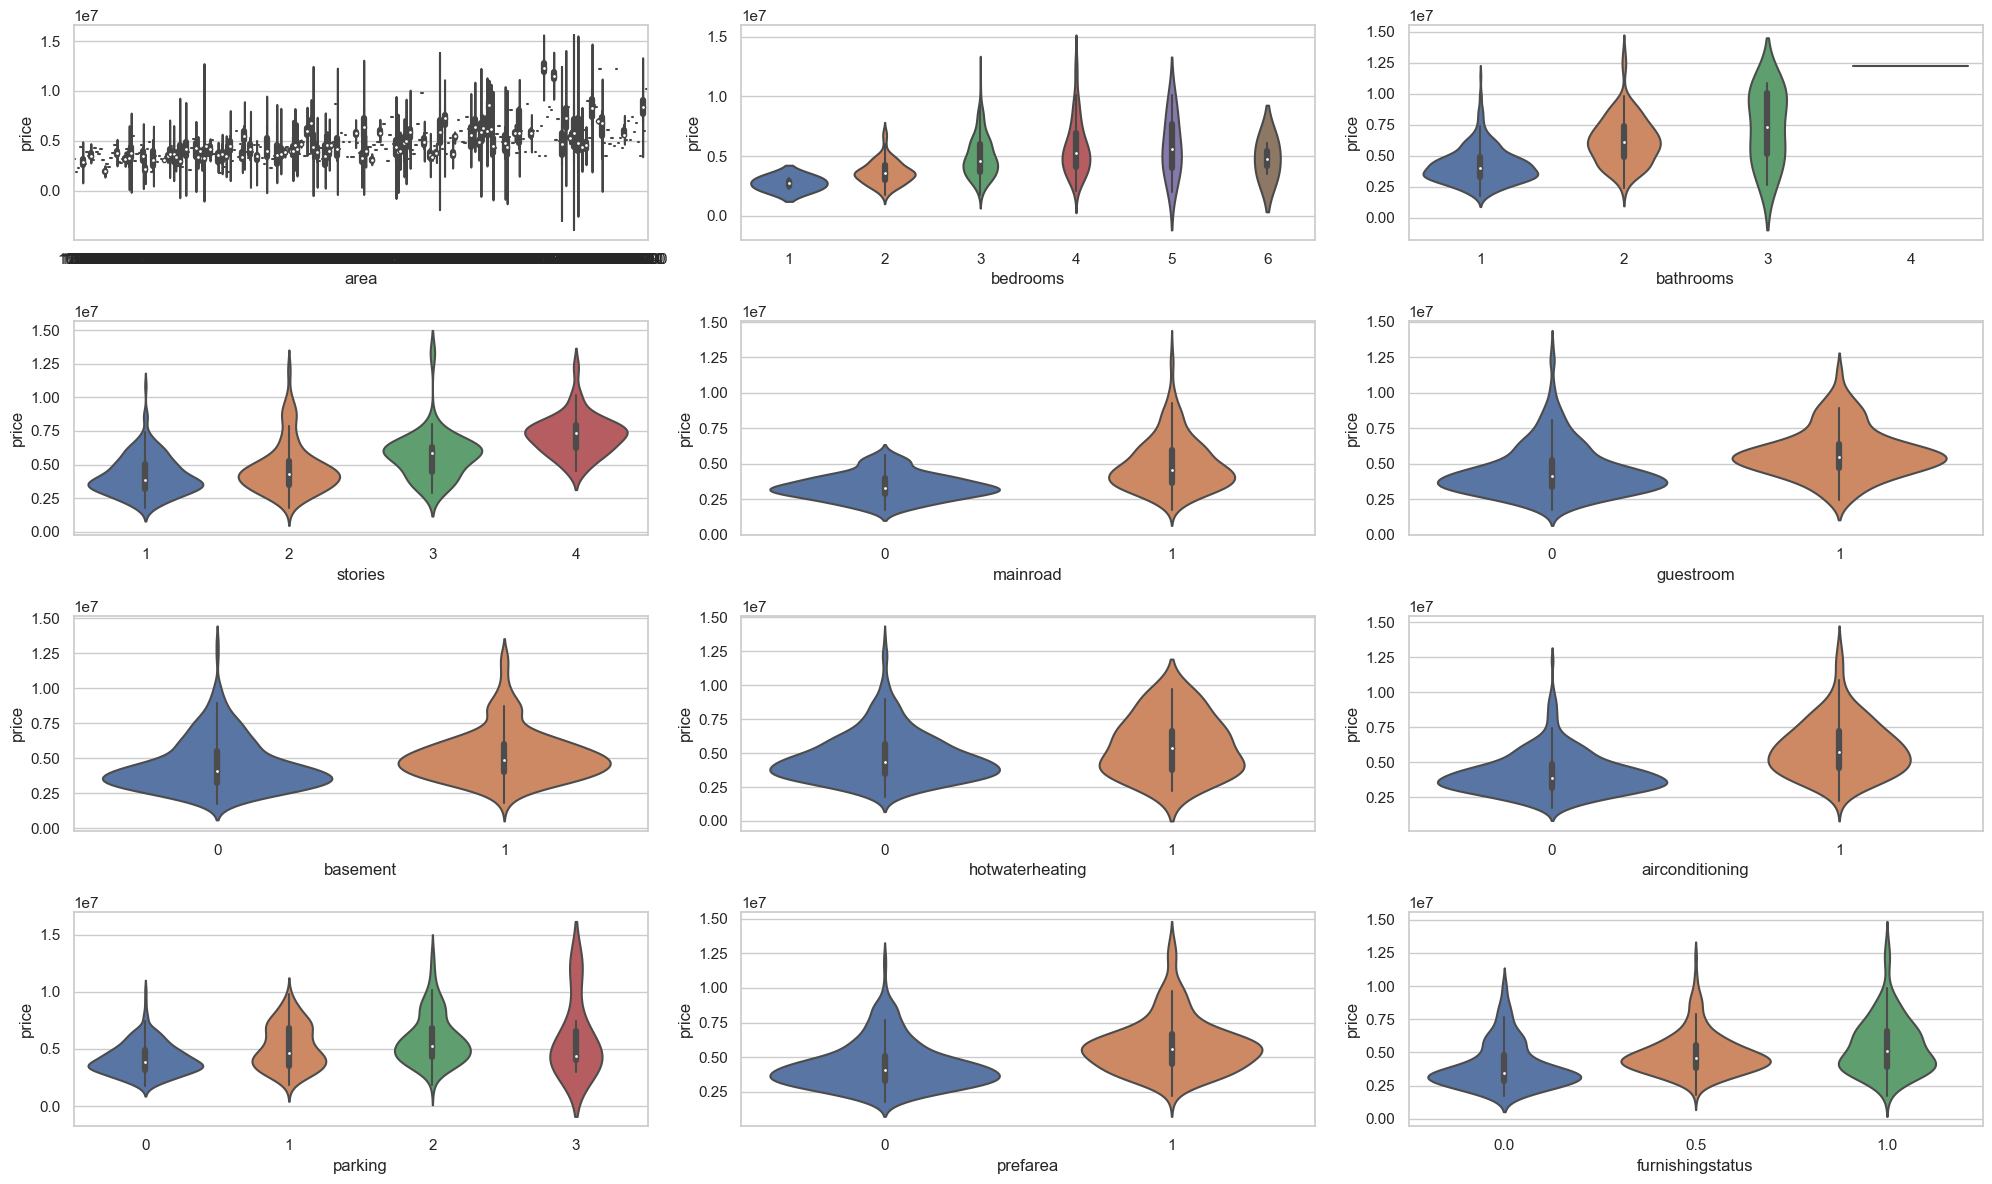

In [19]:
plt.figure(figsize=(20, 12))

j = 1

for i in ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
    plt.subplot(4, 3, j)
    sns.violinplot(x=i, y='price', data=df)
    j += 1

plt.tight_layout()

### Visualizing Price Distribution and Normality: Normal Distribution Curve & Probability Density Function (PDF) Plot


In this section, I create visualizations to explore the distribution of the 'price' variable and assess its normality. Understanding the distribution of 'price' is essential.

#### Normal Distribution Curve:

- The first plot displays a normal distribution curve for the 'price' variable. This curve is constructed using a kernel density estimation (KDE) plot, which estimates the probability density function of 'price.'

- The 'sturges' method is used to determine the number of bins for the histogram-like representation of the data.

- A vertical line is added to the plot at the mean price value, highlighted in lime green. The label indicates the mean price value.

- The legend provides information about the mean price.

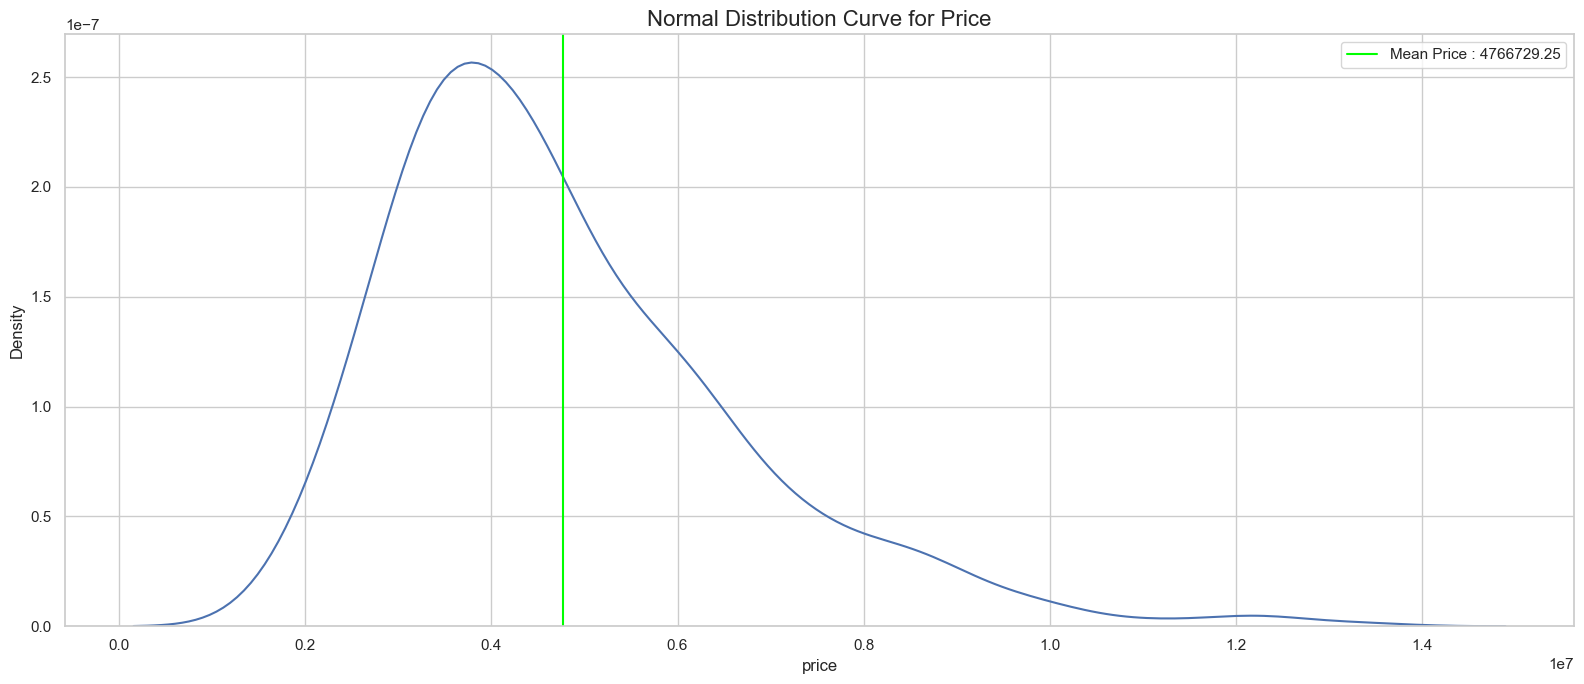

In [20]:
# Create a normal distribution curve for the 'price'.
plt.figure(figsize=(16, 7))

sns.distplot(df["price"], bins="sturges", hist=False)

plt.title("Normal Distribution Curve for Price", fontsize=16)

plt.axvline(x=df["price"].mean(), color="lime",
            label=f"Mean Price : {df['price'].mean():.2f}")

plt.legend()

plt.tight_layout()

#### Probability Density Function (PDF) Plot:

- The second plot showcases the probability density function (PDF) of the 'price' variable. It is constructed based on the normal distribution with the mean and standard deviation of 'price' from the dataset.

- The red curve represents the PDF, which illustrates the likelihood of observing different price values.

- A vertical line at the mean price value is included, similar to the previous plot, and its label indicates the mean value.

These visualizations help us understand the distribution of 'price' and assess whether it follows a normal distribution pattern. This information is valuable for statistical analyses, hypothesis testing, and modeling tasks within the data science process.

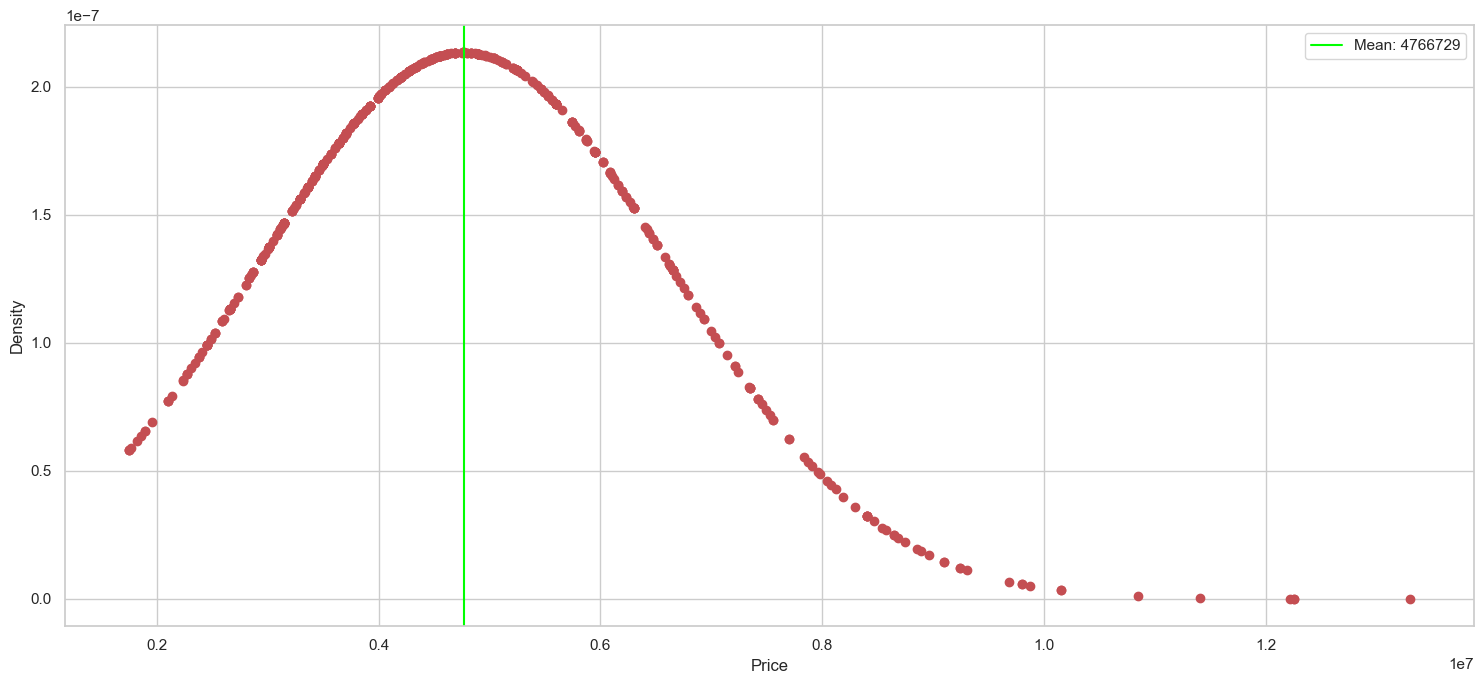

In [21]:
# Create a probablity density function for plotting the normal distribution
def prob_den_func(arr, mean, std):
    power_e = -(((arr - mean)**2) / (2*(std)**2))
    coeff = 1 / (std * np.sqrt(2 * np.pi))
    prob_den = coeff * np.exp(power_e)
    return prob_den


# Plot the normal distribution curve using plt.scatter()
plt.figure(figsize=(15, 7))

plt.scatter(df["price"], prob_den_func(
    df["price"], df["price"].mean(), df["price"].std()), color='r')

plt.xlabel('Price')

plt.ylabel("Density")

plt.axvline(x=df['price'].mean(), color='lime',
            label=f"Mean: {df['price'].mean():.0f}")

plt.legend()

plt.tight_layout()

## Analysis for Optimal Number of Clusters

This section delves into the critical task of determining the optimal number of clusters for K-means clustering, a fundamental aspect of unsupervised machine learning. The objective is to identify meaningful patterns within the dataset and decide on the most suitable number of clusters for our analysis.

##### Inertia Analysis: Assessing Cluster Compactness

Here, I conduct an inertia analysis for different numbers of clusters. Inertia represents the within-cluster sum of squares and serves as a crucial metric for evaluating the compactness of clusters. Analyzing inertia values helps in understanding the trade-offs between cluster quality and the number of clusters chosen.

### Elbow Analysis

The primary focus is on the elbow analysis, a widely used technique to determine the ideal number of clusters (k). This process involves executing K-means clustering for varying numbers of clusters, ranging from 1 to 10 in this case, and computing the inertia for each clustering configuration.

The key idea is to identify the "elbow point" on the inertia curve. The elbow point represents a point of inflection where the rate of decrease in inertia sharply changes. This point often indicates the optimal number of clusters because it balances cluster quality with the simplicity of having fewer clusters.

The information gained from this analysis is valuable for making informed decisions in subsequent steps. For example, it can guide market segmentation or customer profiling based on the clusters identified. The optimal k value determined through the elbow analysis serves as a critical input for further data-driven strategies and analyses.

In [22]:
X = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].iloc[:, :].values

inertia = []

for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300,
                        tol=0.0001,  random_state=111, algorithm='lloyd'))
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

### Elbow Analysis Graph

Here, I am visualizing the inertia values calculated for different numbers of clusters in the K-means clustering process. The purpose of this visualization is to help you determine the optimal number of clusters using the **elbow method**.

The resulting plot displays the inertia values for different numbers of clusters. The **elbow method** involves visually inspecting this plot to find an **elbow point** where the inertia starts to decrease at a slower rate. The optimal number of clusters is often selected at or near this elbow point because it represents a good trade-off between the number of clusters and the compactness of the data points within each cluster.

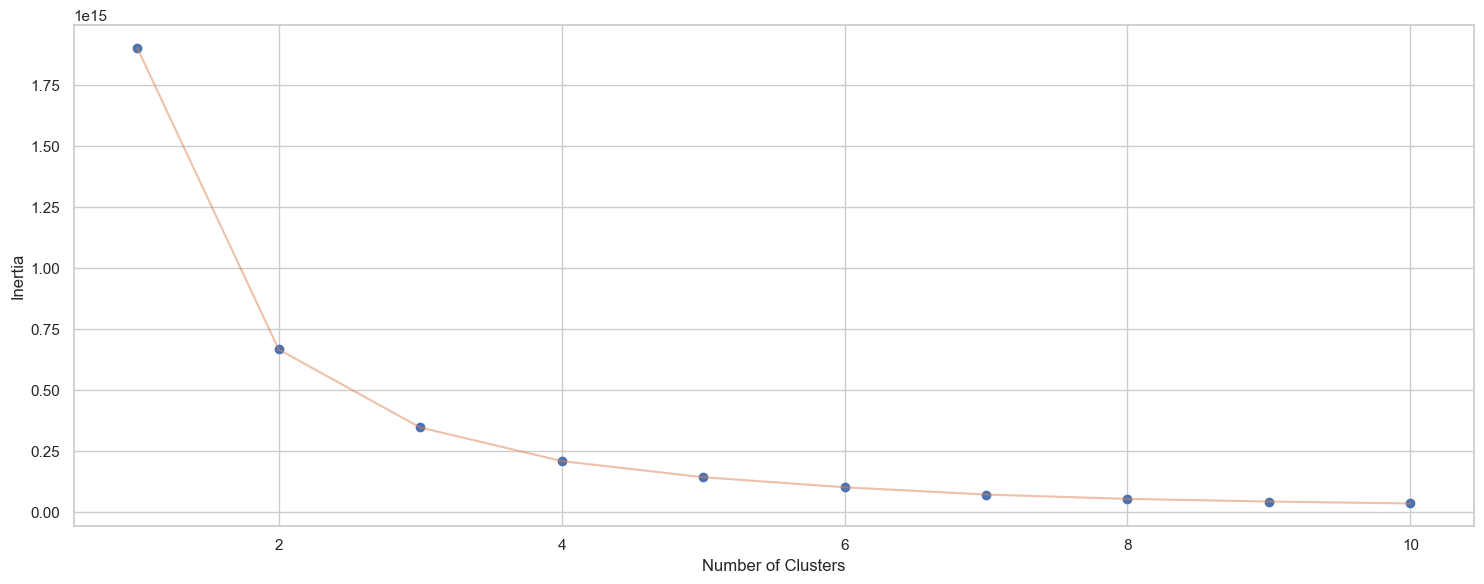

In [23]:
plt.figure(1, figsize=(15, 6))

plt.plot(np.arange(1, 11), inertia, 'o')

plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)

plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')

plt.tight_layout()

## K-means Clustering: Segmenting Data into 5 Clusters

In this section, I employ the K-means clustering algorithm to segment the data into 5 distinct clusters. The choice of 5 clusters is based on prior analysis and is intended to provide a meaningful partitioning of the data.

I configure the K-means algorithm with various parameters, including `k-means++` initialization, 10 initializations, a maximum of 300 iterations, a tolerance of 0.0001 for convergence, and a specific random seed for reproducibility (random_state=111). Additionally, I use the `elkan` algorithm variant for efficient computation.

Upon fitting the algorithm to the data, I obtain cluster labels for each data point (labels13) and the centroids (center points) of the resulting clusters (centroids13). These clusters and centroids are instrumental in understanding the inherent structure within the data and can guide further analyses and decision-making.

This K-means clustering analysis aligns with my interests in data science and machine learning, as it allows for the discovery of hidden patterns and structures within the dataset, which can be valuable for market segmentation and other applications.

In [24]:
algorithm = (KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001,  random_state=111, algorithm='elkan'))

algorithm.fit(X)

labels13 = algorithm.labels_

centroids13 = algorithm.cluster_centers_

### Data Visualization: K-means Clustering Results

In this section, I visualize the results of the K-means clustering analysis. The scatter plot effectively displays the clustered data points, providing insights into how the data has been partitioned into 5 distinct clusters.

This scatter plot offers an intuitive visualization of the K-means clustering results, highlighting how data points are grouped into clusters and the location of cluster centroids. It serves as a powerful tool for understanding the structure and patterns within the data, aligning with my interests in data science and machine learning.

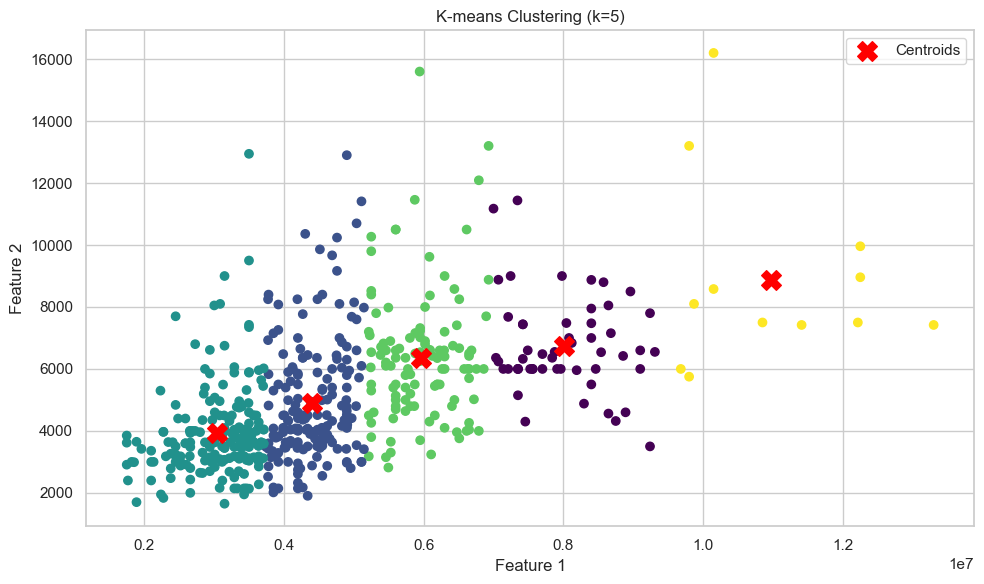

In [25]:
# Data Visualization
# Create a scatter plot of the clustered data

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=labels13, cmap='viridis')

plt.scatter(centroids13[:, 0], centroids13[:, 1],
            marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.title('K-means Clustering (k=5)')

plt.legend()

plt.tight_layout()

## Cluster Profiling: Analyzing Cluster Characteristics

In this section, I perform cluster profiling to gain a deeper understanding of each cluster`s characteristics. Cluster profiling involves calculating and presenting statistics for each feature within each cluster. This analysis provides valuable insights into how each cluster differs in terms of various attributes.

- A DataFrame named `cluster_profiles` is created to store the data. It includes the original features (`price,` `area,` `bedrooms,` `bathrooms,` `stories,` `mainroad,` `guestroom,` `basement,` `hotwaterheating,` `airconditioning,` `parking,` `prefarea,` and `furnishingstatus`).

- I include a new column labeled `Cluster` in the DataFrame, which contains the cluster labels assigned to each data point based on the K-means clustering results.

- By aggregating and summarizing data within each cluster, we can calculate and print statistics such as mean, median, standard deviation, and quartiles for each feature. These statistics help in understanding the unique characteristics of each cluster.

Cluster profiling is a crucial step for interpreting the results of clustering analysis. It allows us to identify patterns and differences between clusters, which can be valuable for making data-driven decisions and tailoring strategies based on the identified cluster profiles.


### Insights for Market Segmentation

The insights gained from the K-means clustering analysis provide valuable information for potential market segmentation or customer profiling. Understanding the identified clusters and their characteristics can guide data-driven decision-making and strategic planning in various domains.

Throughout the notebook, I apply data science and machine learning techniques to explore clustering possibilities and make informed decisions, aligning with my interests in data science and machine learning.

In [26]:
# Cluster Profiling
# Calculate and print cluster statistics for each feature
cluster_profiles = pd.DataFrame(X, columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                                'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])

cluster_profiles['Cluster'] = labels13

### Cluster Statistics: Aggregating Cluster Characteristics

Then, I calculated cluster statistics by grouping the data by cluster labels and computing aggregate statistics (mean and standard deviation) for each cluster and each feature. 

The resulting `cluster_statistics` DataFrame stores these statistics, providing insights into the central tendencies and spread of feature values within each cluster.

This allows me to understand the characteristics and variations of each cluster with respect to the original features.

In [27]:
cluster_statistics = cluster_profiles.groupby('Cluster').agg(['mean', 'std'])

Then, I printed the cluster statistics that I calculated earlier. 

The printed output will show cluster statistics in a tabular format, with each row representing a cluster and each column representing a feature. 

For each feature, it prints the mean and standard deviation values for each cluster. This information provides insights into how each cluster differs from others in terms of the features` central tendency and variability.

In [28]:
# Print cluster statistics
print(cluster_statistics)

                price                       area               bedrooms  \
                 mean           std         mean          std      mean   
Cluster                                                                   
0        8.004952e+06  6.800025e+05  6731.641509  1543.907917  3.377358   
1        4.398669e+06  3.905192e+05  4906.322034  1952.533600  2.932203   
2        3.044981e+06  5.049836e+05  3926.838710  1475.062313  2.645161   
3        5.956821e+06  4.918574e+05  6366.384615  2081.479459  3.256410   
4        1.097717e+07  1.258326e+06  8882.500000  3019.319987  3.750000   

                  bathrooms             stories            ...  \
              std      mean       std      mean       std  ...   
Cluster                                                    ...   
0        0.595703  1.754717  0.476593  2.735849  1.112014  ...   
1        0.695711  1.186441  0.418652  1.689266  0.639201  ...   
2        0.722535  1.059140  0.258368  1.456989  0.550950  ...   
3  

In this code snippet, I am performing cluster validation by calculating the Silhouette Score and printing the result. 

A higher Silhouette Score indicates better separation and cohesion of clusters, with values typically ranging from -1 to 1.

The printed output will display the Silhouette Score for the clustering results, providing a quantitative measure of how well the data points are grouped into clusters. Higher scores indicate more appropriate cluster assignments.

In [29]:
# Validation (Silhouette Score)

silhouette_avg = silhouette_score(X, labels13)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5461958286837496


The, I visualised the distribution of properties in each cluster using a countplot. 

The resulting countplot visually represents how properties are distributed among the clusters. Each bar corresponds to a cluster, and the height of the bar indicates the number of properties assigned to that cluster. This visualization in understanding the size and distribution of each cluster in the dataset.

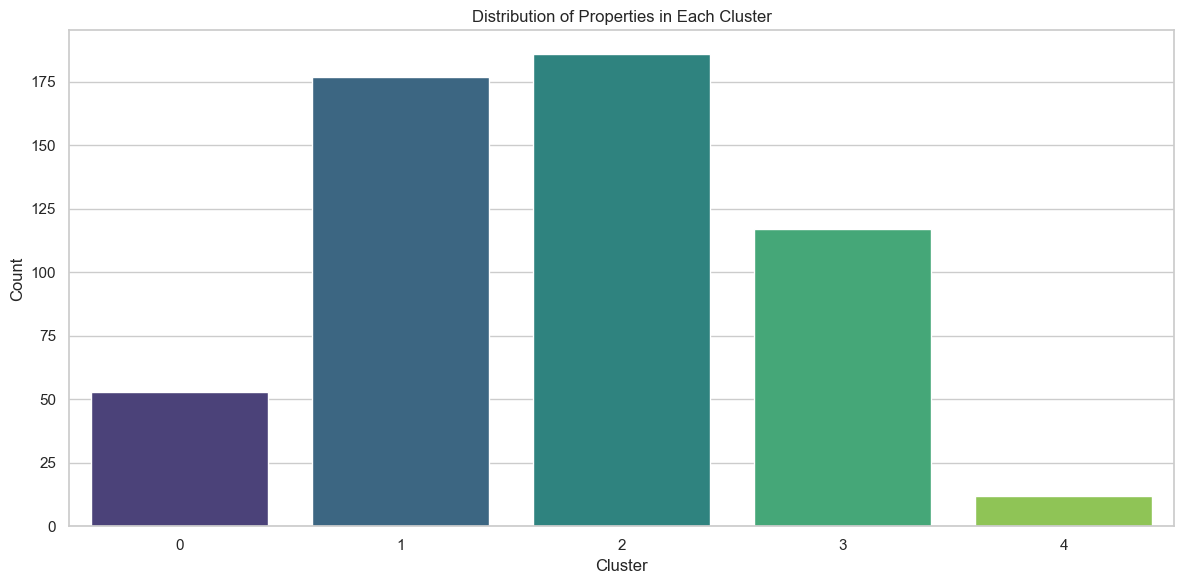

In [30]:
# Visualize the distribution of properties in each cluster

plt.figure(figsize=(12, 6))

sns.countplot(data=cluster_profiles, x='Cluster', palette='viridis')

plt.title('Distribution of Properties in Each Cluster')
plt.xlabel('Cluster')

plt.ylabel('Count')

plt.tight_layout()

Then, I created pairplots to visualize the cluster profiles for specific attributes while distinguishing clusters by color. 

The resulting pairplot displays scatterplots of attribute pairs, with each point colored according to its cluster assignment. This visualization helps in understanding how different attributes correlate with each other within each cluster and whether there are distinct patterns or trends within the data.

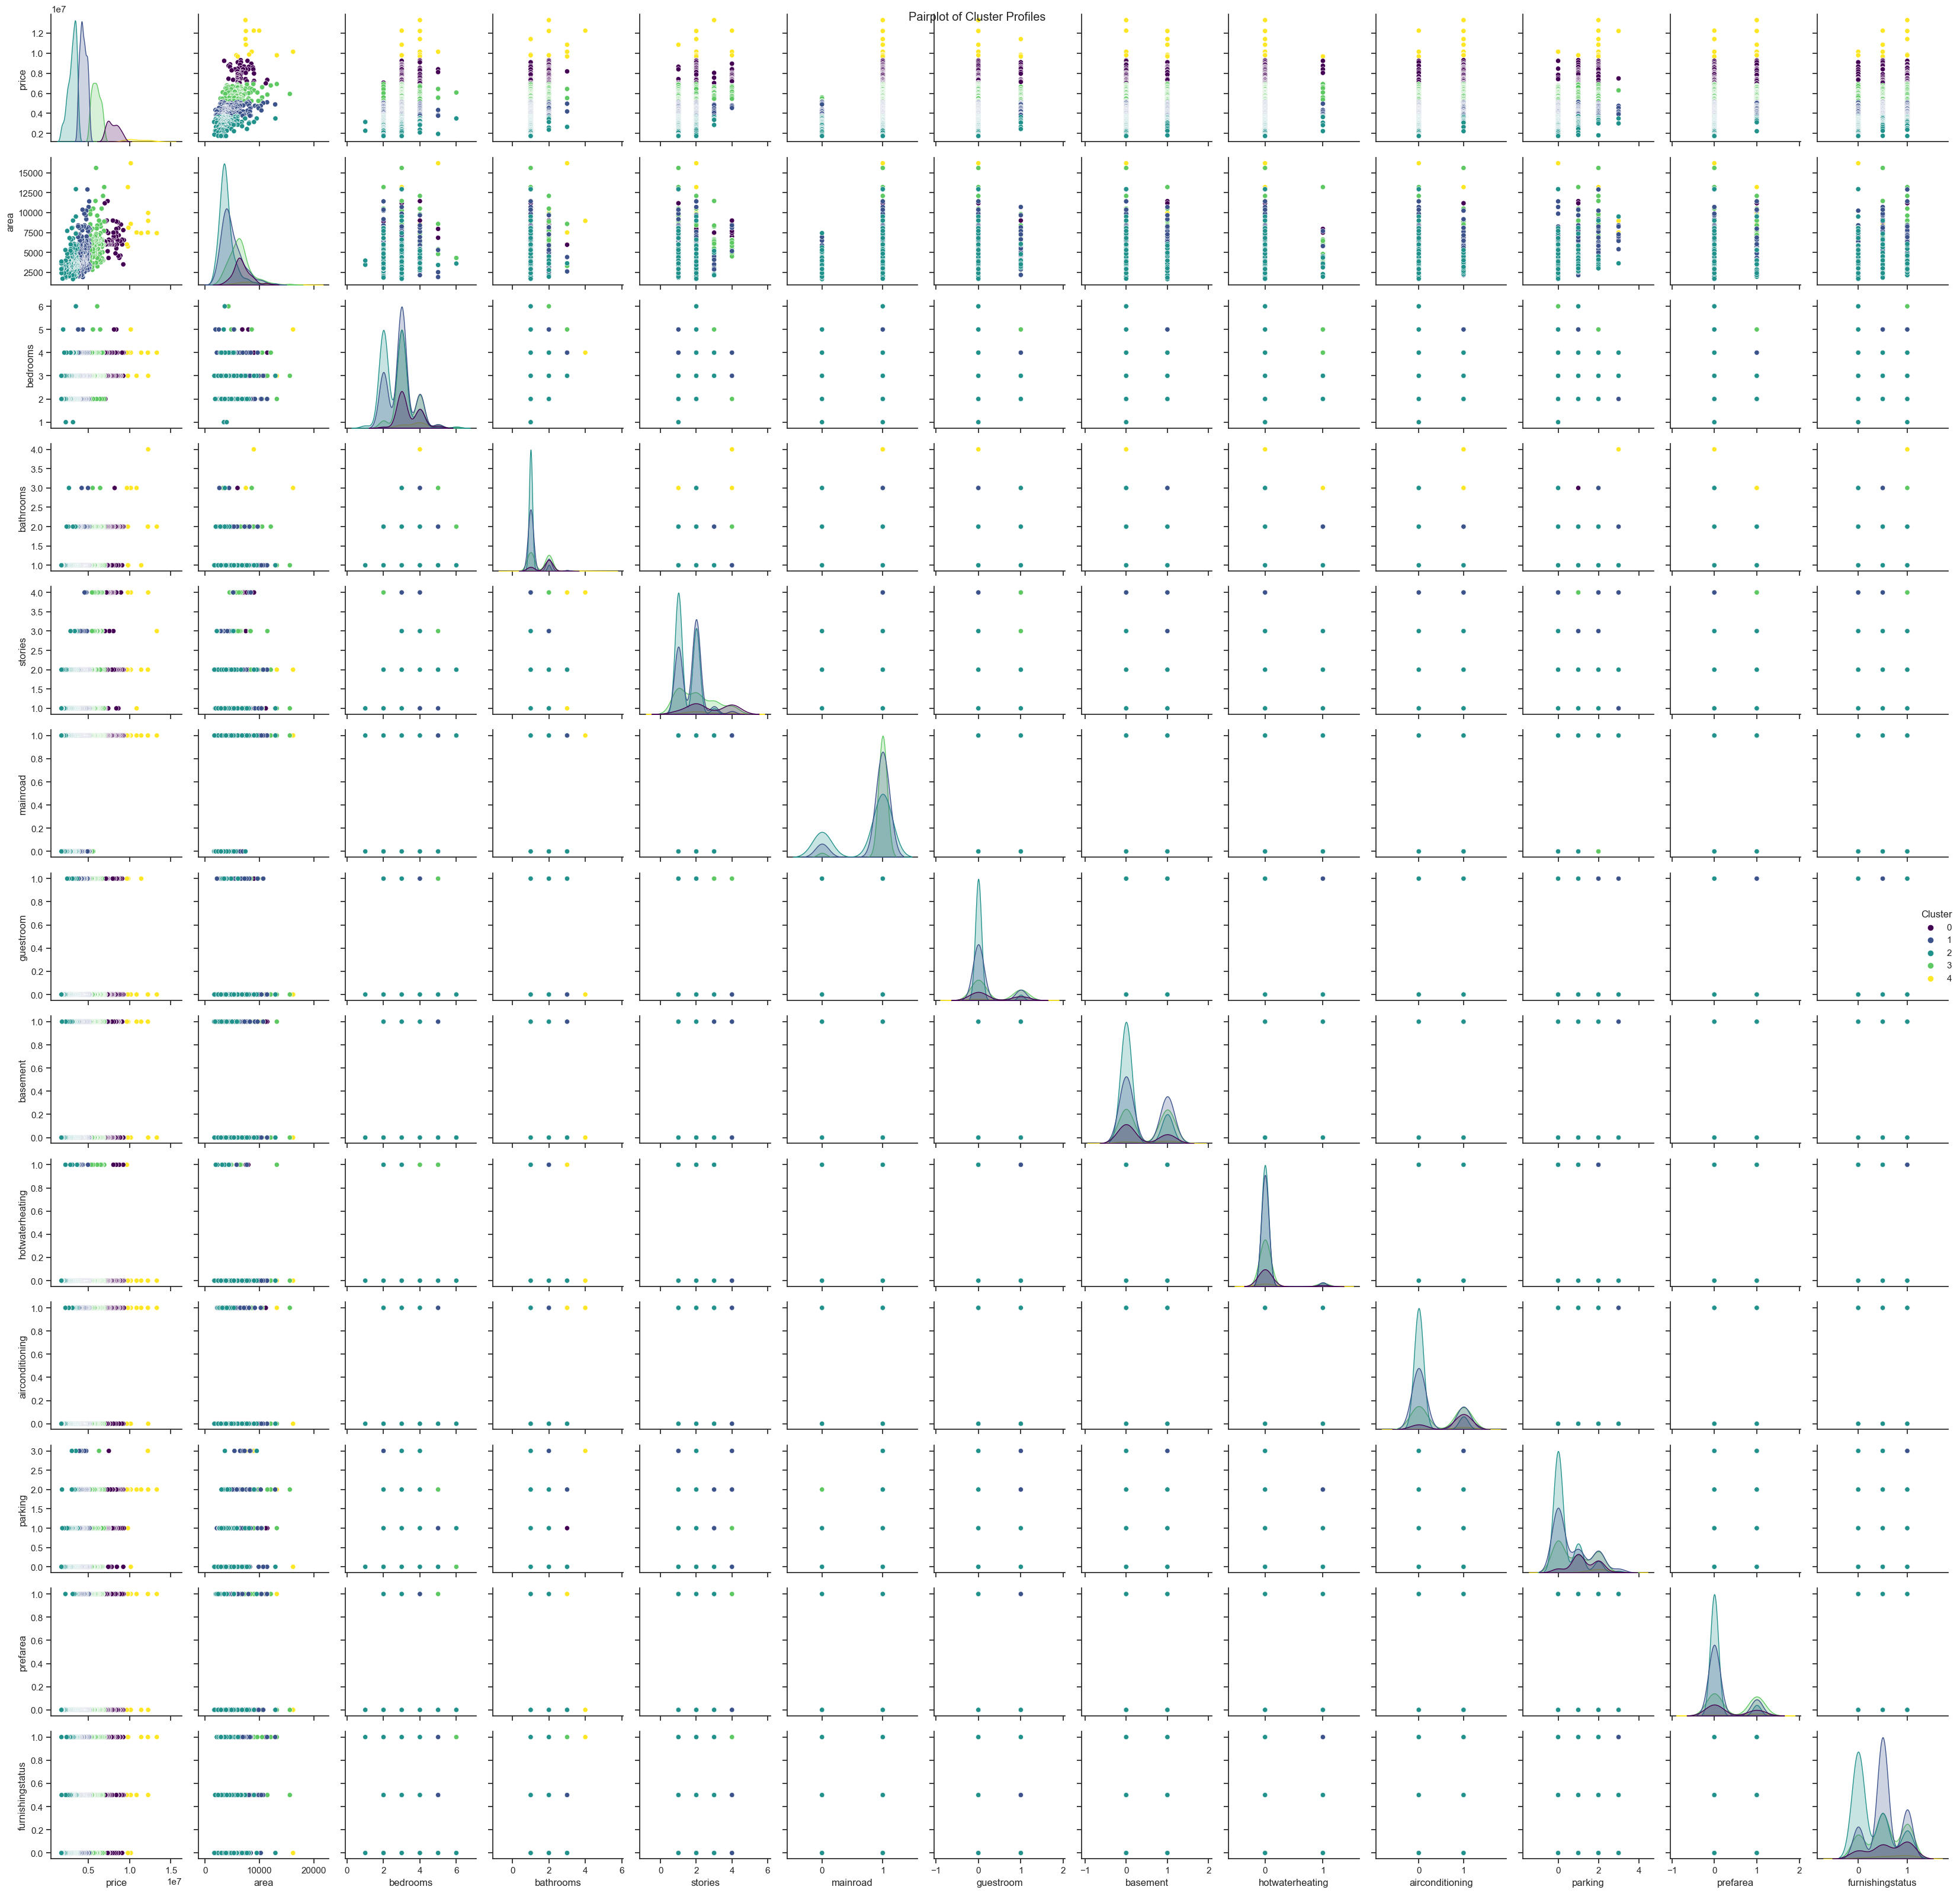

In [31]:
# Visualize cluster profiles using a pairplot

sns.set(style="ticks")

cluster_attributes = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                      'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

sns.pairplot(data=cluster_profiles, hue='Cluster',
             vars=cluster_attributes, palette='viridis')

plt.suptitle('Pairplot of Cluster Profiles')

plt.tight_layout()

Now, I am creating a heatmap to visualize cluster statistics for the `price` feature (specifically, the mean and standard deviation) across different clusters. Here`s an explanation of each part of the code:

The heatmap provides a clear overview of how the `price` feature varies across different clusters. It helps identify clusters with distinct price characteristics and any variations within those clusters.

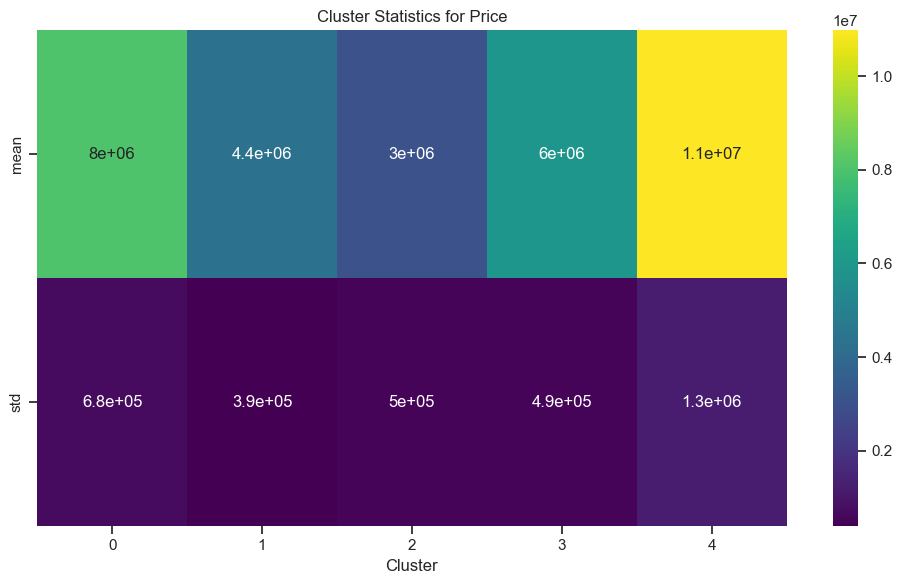

In [32]:
# Display cluster statistics as a heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(cluster_statistics['price'][[
            'mean', 'std']].transpose(), annot=True, cmap='viridis')

plt.title('Cluster Statistics for Price')

plt.tight_layout()

Finally, I am summarizing the characteristics of each cluster. I iterated through the clusters (from 0 to 4 in this case) and printed relevant information for each one. 

The code produces an output that summarizes each cluster`s characteristics, including the number of properties in each cluster and statistics such as mean and standard deviation for each feature within the cluster. This information is useful for understanding the distinct properties and patterns within each cluster.

In [33]:
# Summarize cluster characteristics
for cluster in range(5):
    print(f'\nCluster {cluster}:')
    print(
        f'Number of Properties: {len(cluster_profiles[cluster_profiles["Cluster"] == cluster])}')
    print(cluster_statistics.loc[cluster])


Cluster 0:
Number of Properties: 53
price             mean    8.004952e+06
                  std     6.800025e+05
area              mean    6.731642e+03
                  std     1.543908e+03
bedrooms          mean    3.377358e+00
                  std     5.957030e-01
bathrooms         mean    1.754717e+00
                  std     4.765929e-01
stories           mean    2.735849e+00
                  std     1.112014e+00
mainroad          mean    1.000000e+00
                  std     0.000000e+00
guestroom         mean    3.207547e-01
                  std     4.712334e-01
basement          mean    3.207547e-01
                  std     4.712334e-01
hotwaterheating   mean    7.547170e-02
                  std     2.666788e-01
airconditioning   mean    7.547170e-01
                  std     4.343722e-01
parking           mean    1.264151e+00
                  std     6.836256e-01
prefarea          mean    3.396226e-01
                  std     4.781131e-01
furnishingstatus  mean    6

## Real Estate Market Data Final Analysis

### Clusters Overview

The dataset was divided into five clusters (Cluster 0 to Cluster 4) based on various property attributes. Below is a detailed breakdown of each cluster:

#### Cluster 0:
- Number of Properties: 53
- Mean Price: approximately 8.0 million
- Mean Area: approximately 6,731 square feet
- Mean Bedrooms: approximately 3.38 bedrooms
- Mean Bathrooms: approximately 1.75 bathrooms
- Mean Stories: approximately 2.74 stories
- Mainroad: predominantly `yes` (1)
- Guestroom: moderately present
- Basement: moderately present
- Hotwaterheating: less common
- Airconditioning: predominantly `yes` (1)
- Parking: moderate availability
- Prefarea: moderately preferred
- Furnishing Status: semi-furnished (0.5)

**Comments**:
- This cluster represents properties with relatively high prices and larger areas.
- Most properties in this cluster have air conditioning and are located on the main road.
- They have a moderate number of bedrooms and bathrooms.
- This cluster is favored by those who prefer semi-furnished properties.

#### Cluster 1:
- Number of Properties: 177
- Mean Price: approximately 4.4 million
- Mean Area: approximately 4,906 square feet
- Mean Bedrooms: approximately 2.93 bedrooms
- Mean Bathrooms: approximately 1.19 bathrooms
- Mean Stories: approximately 1.69 stories
- Mainroad: predominantly `yes` (1)
- Guestroom: less common
- Basement: moderately present
- Hotwaterheating: less common
- Airconditioning: less common
- Parking: moderate availability
- Prefarea: less preferred
- Furnishing Status: semi-furnished (0.5)

**Comments**:
- This cluster represents properties with moderate prices and areas.
- Most properties in this cluster are located on the main road but have less air conditioning.
- They tend to have fewer bedrooms and bathrooms and are less preferred by those who prioritize furnished properties.

#### Cluster 2:
- Number of Properties: 186
- Mean Price: approximately 3.0 million
- Mean Area: approximately 3,927 square feet
- Mean Bedrooms: approximately 2.65 bedrooms
- Mean Bathrooms: approximately 1.06 bathrooms
- Mean Stories: approximately 1.46 stories
- Mainroad: moderately present
- Guestroom: less common
- Basement: less common
- Hotwaterheating: less common
- Airconditioning: less common
- Parking: less availability
- Prefarea: less preferred
- Furnishing Status: less furnished (0)

**Comments**:
- This cluster represents properties with lower prices and smaller areas.
- Properties in this cluster have fewer bedrooms, bathrooms, and amenities.
- They are less preferred for their smaller size and fewer amenities.

#### Cluster 3:
- Number of Properties: 117
- Mean Price: approximately 5.96 million
- Mean Area: approximately 6,366 square feet
- Mean Bedrooms: approximately 3.26 bedrooms
- Mean Bathrooms: approximately 1.49 bathrooms
- Mean Stories: approximately 2.04 stories
- Mainroad: predominantly `yes` (1)
- Guestroom: moderately present
- Basement: predominantly `yes` (1)
- Hotwaterheating: less common
- Airconditioning: less common
- Parking: high availability
- Prefarea: moderately preferred
- Furnishing Status: semi-furnished (0.5)

**Comments**:
- This cluster represents properties with moderate to high prices and moderate areas.
- Properties in this cluster tend to have more bedrooms and bathrooms.
- They are preferred for their proximity to the main road and availability of parking spaces.

#### Cluster 4:
- Number of Properties: 12
- Mean Price: approximately 10.98 million
- Mean Area: approximately 8,882 square feet
- Mean Bedrooms: approximately 3.75 bedrooms
- Mean Bathrooms: approximately 2.25 bathrooms
- Mean Stories: approximately 2.5 stories
- Mainroad: predominantly `yes` (1)
- Guestroom: moderately present
- Basement: predominantly `yes` (1)
- Hotwaterheating: less common
- Airconditioning: predominantly `yes` (1)
- Parking: high availability
- Prefarea: moderately preferred
- Furnishing Status: semi-furnished (0.5)

**Comments**:
- This cluster represents properties with the highest prices and the largest areas.
- They have more bedrooms and bathrooms and are well-equipped with amenities.
- This cluster is favored by those who prefer larger and fully furnished properties.

## Conclusion

The K-means clustering analysis revealed distinct clusters of properties based on their attributes. These clusters help in understanding the different types of properties available in the housing market and their respective characteristics.

The Silhouette Score of the clustering indicates that the clusters are reasonably well-separated. However, the choice of the number of clusters (k=5) was based on the elbow method, and other clustering techniques can also be explored for further analysis.

Please note that this README provides a summary of the clusters, and further domain-specific insights can be derived by considering additional features or conducting more in-depth analysis.


In conclusion, this Python code demonstrates how to apply K-means clustering to housing market data, enabling us to gain valuable insights into the underlying structure of the dataset. Throughout the code, we performed various data preprocessing tasks, including data loading, handling missing values, and encoding categorical variables. We then conducted exploratory data analysis (EDA) to understand the data distribution and relationships between different features.

The core of the analysis involved applying the K-means clustering algorithm to group similar properties together. By tuning the number of clusters and visualizing the results, we were able to identify distinct clusters of properties based on various attributes such as price, area, and the presence of amenities. The Silhouette Score was used to assess the quality of the clustering.

Additionally, we created informative visualizations, including pairplots and heatmaps, to better understand the cluster profiles and attribute distributions within each cluster. Finally, we summarized cluster characteristics to provide a clear overview of the properties within each cluster.

This code can be adapted and extended for various clustering tasks in real estate analysis, market segmentation, and customer profiling, providing valuable insights and supporting data-driven decision-making processes.